In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 제출 LB

In [2]:
rank_1_T08 = pd.read_excel('./RTFACT_241001_Public_Possibility_T#08.xlsx')
rank_4_S01 = pd.read_excel('./RTFACT_240927_Public_Possibility_S01.xlsx')   # index col 제거해야함, cols 2
rank_15_S01_11 = pd.read_excel('./RTFACT_241004_Public_Possibility_S01_11.xlsx')

### 미제출 LB

In [3]:
rank_2_T27 = pd.read_excel('./RTFACT_241004_Public_Possibility_T#27.xlsx')
rank_5_T01 = pd.read_excel('./RTFACT_241001_Public_Possibility_T#01.xlsx')
rank_6_JT27 = pd.read_excel('./RTFACT_241004_Public_Possibility_JT27.xlsx')
rank_7_J01 = pd.read_excel('./RTFACT_240927_Public_Possibility_J01.xlsx')       # cols 2
rank_10_Med07 = pd.read_excel('./RTFACT_241001_Public_Possibility_Med07.xlsx')  # cols 2
rank_11_Med06= pd.read_excel('./RTFACT_241001_Public_Possibility_Med06.xlsx')   # cols 2

In [4]:
rank_4_S01 = rank_4_S01.drop(columns=['index', '0'])
rank_7_J01 = rank_7_J01.drop(columns=['0'])
rank_10_Med07 = rank_10_Med07.drop(columns=['0'])
rank_11_Med06 = rank_11_Med06.drop(columns=['0'])

In [5]:
rank_4_S01

,1
0,0.000127
1,0.000149
2,0.000181
3,0.000045
4,0.000038
...,...
295,0.996589
296,0.000034
297,0.070218
298,0.856715


---

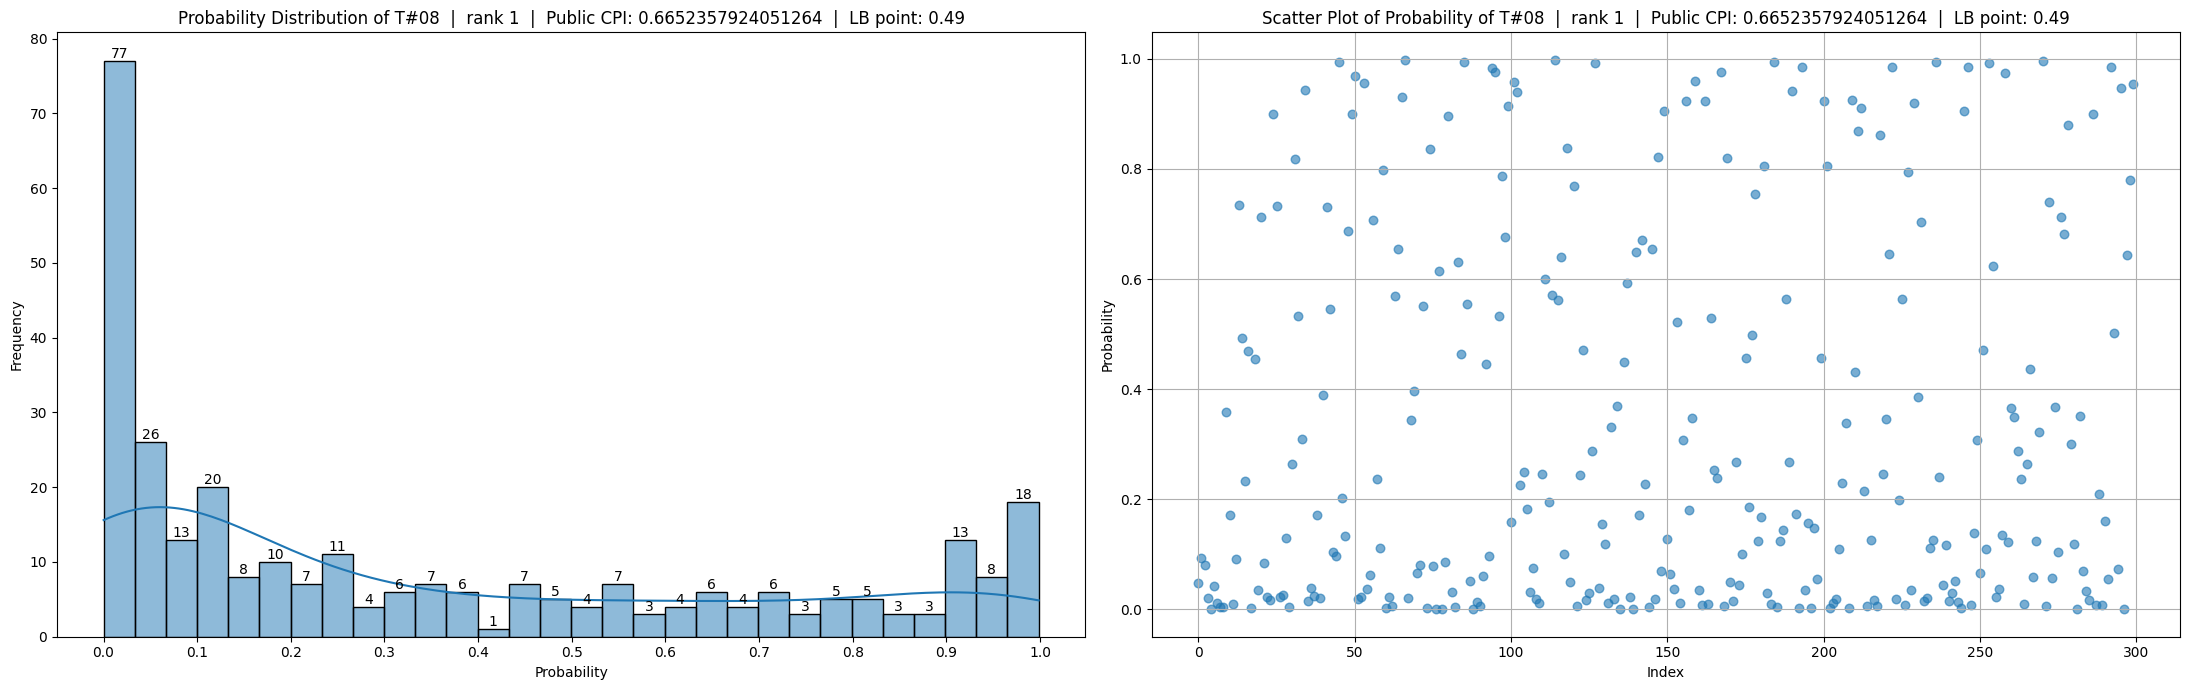

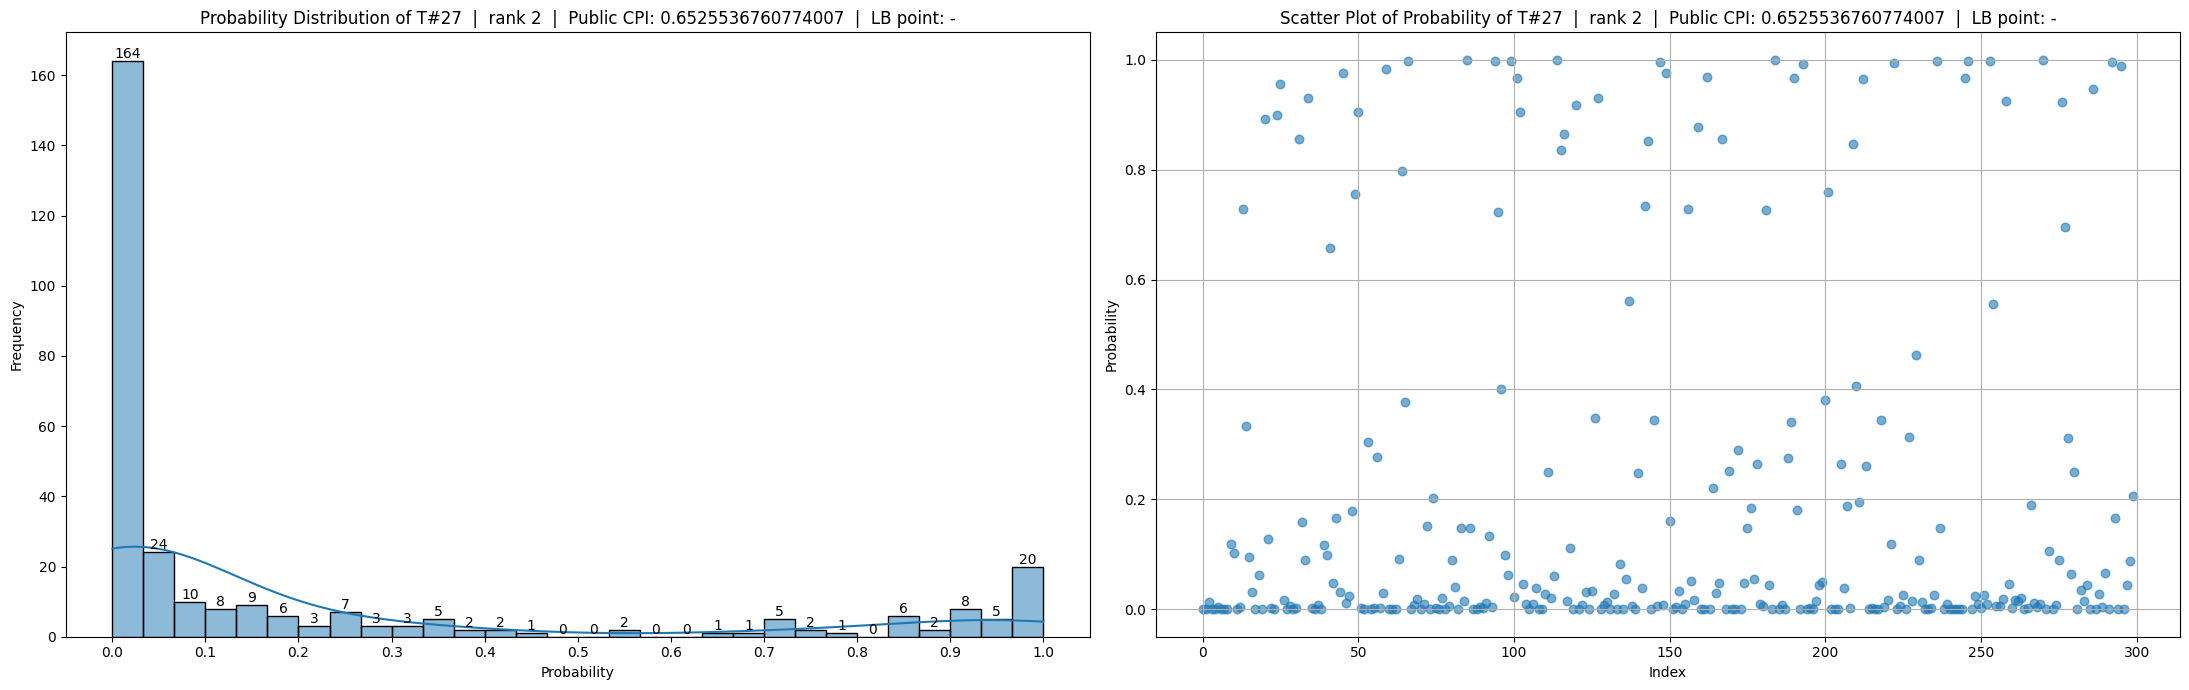

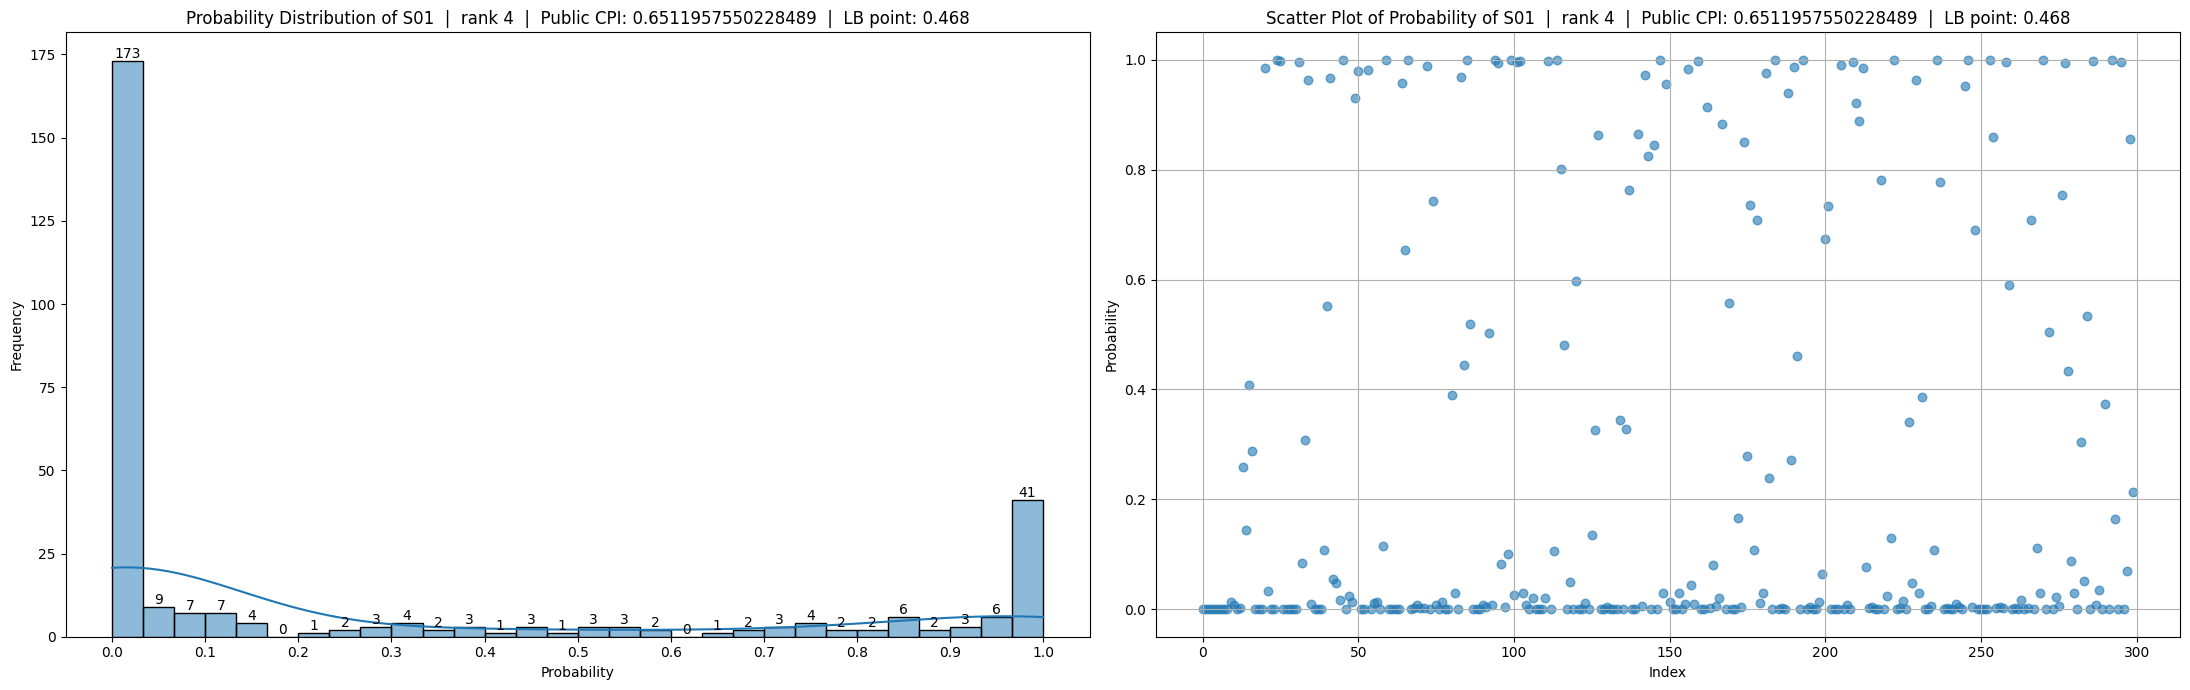

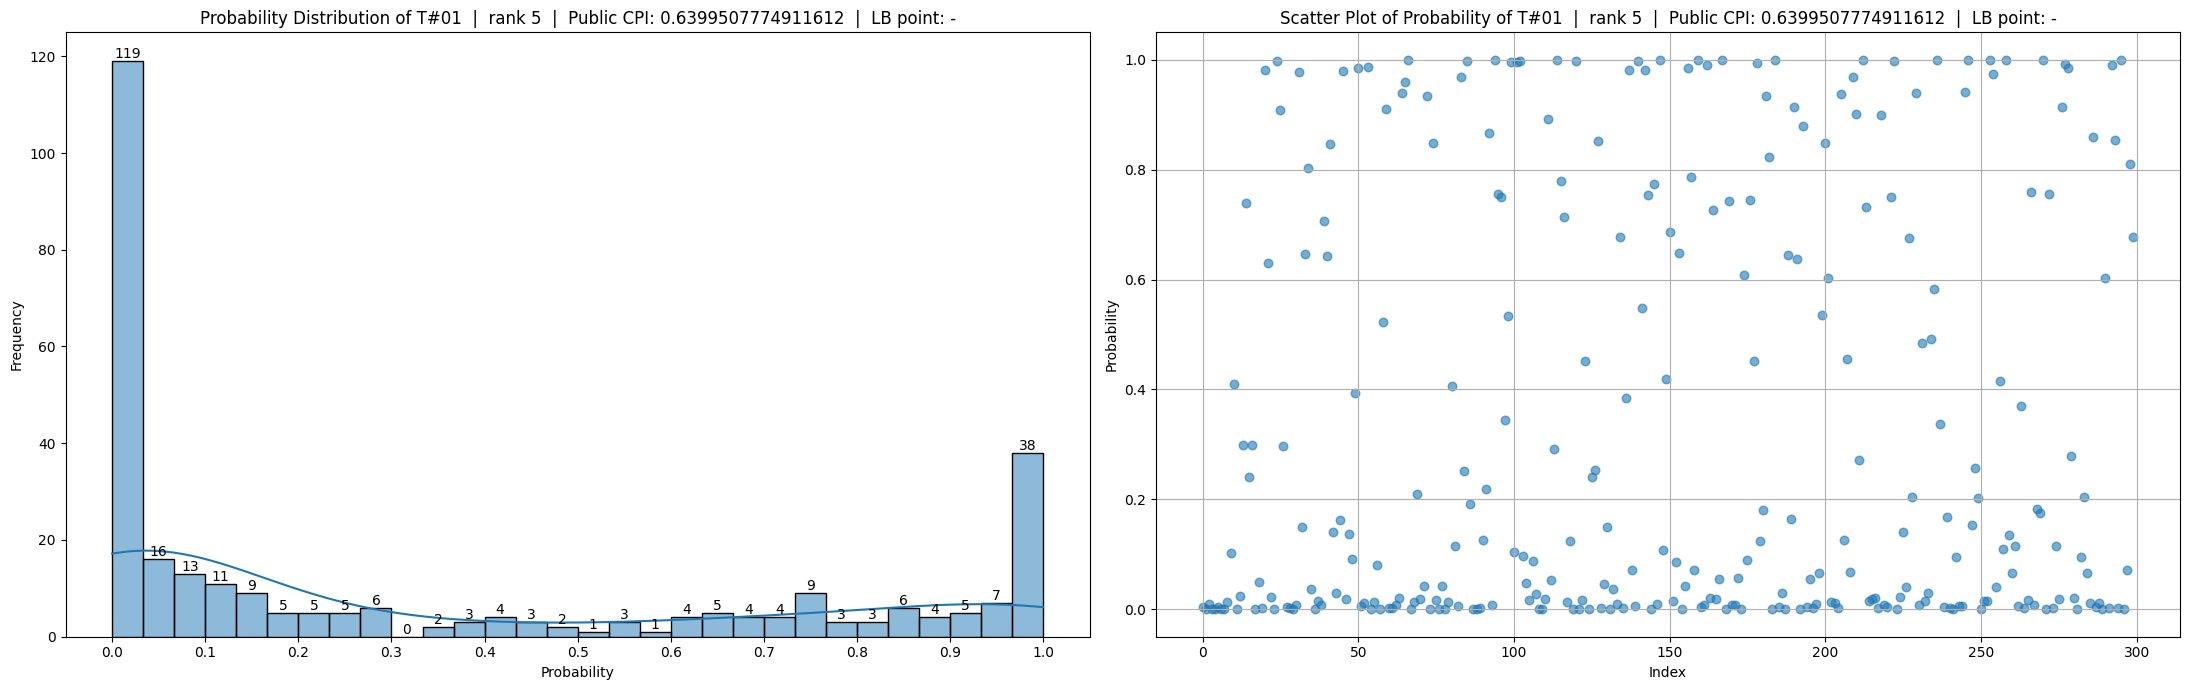

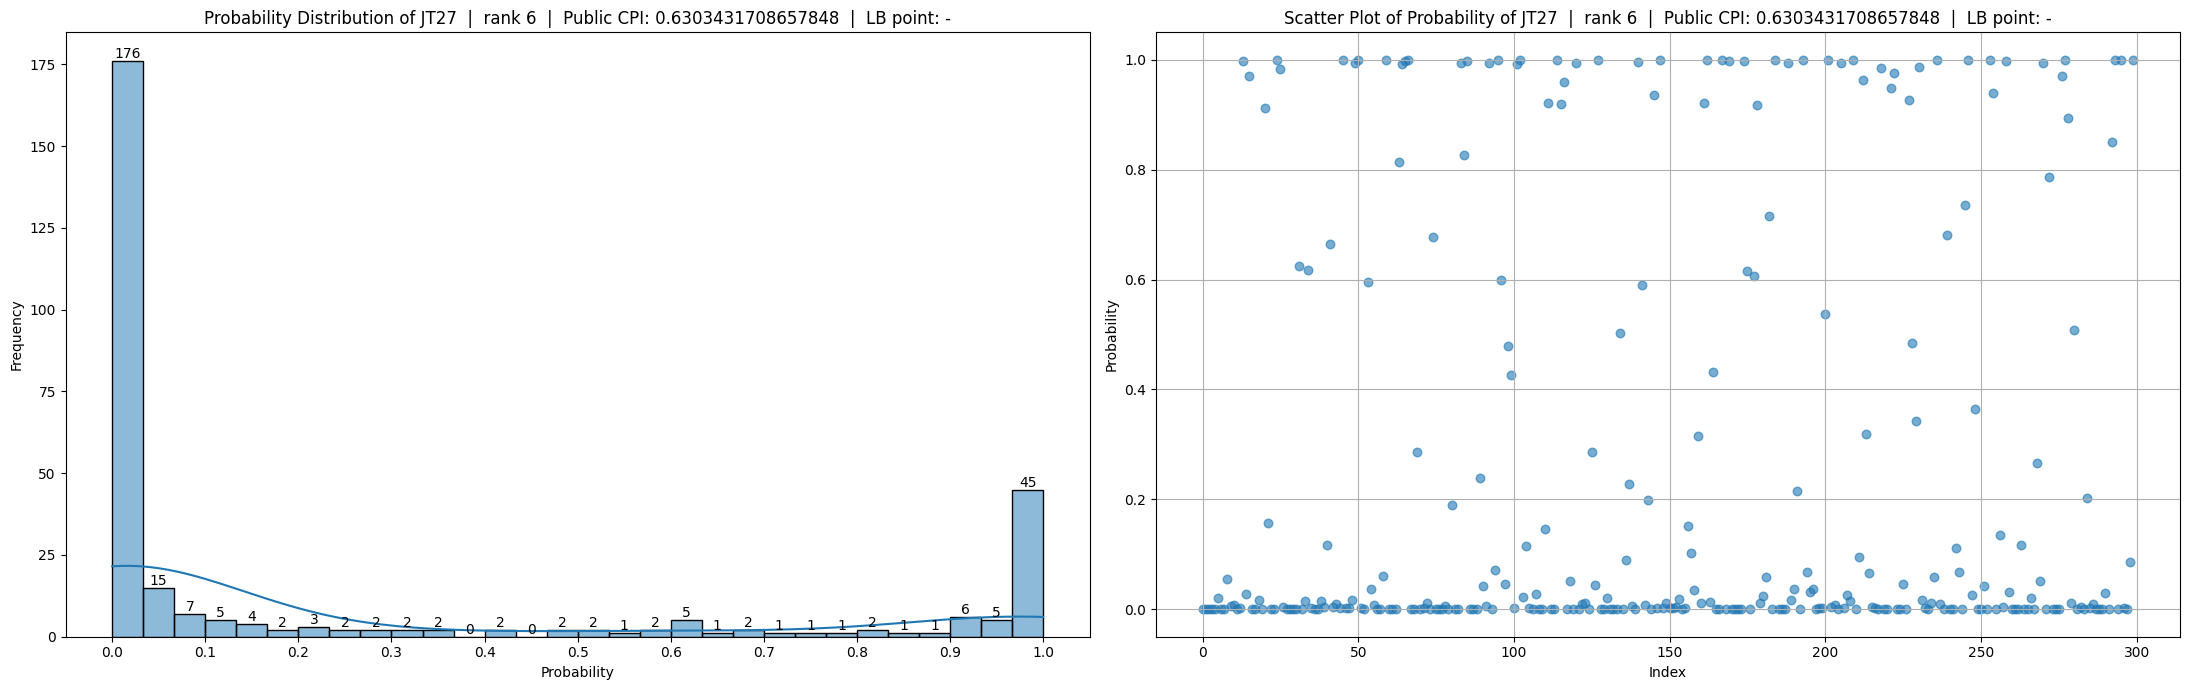

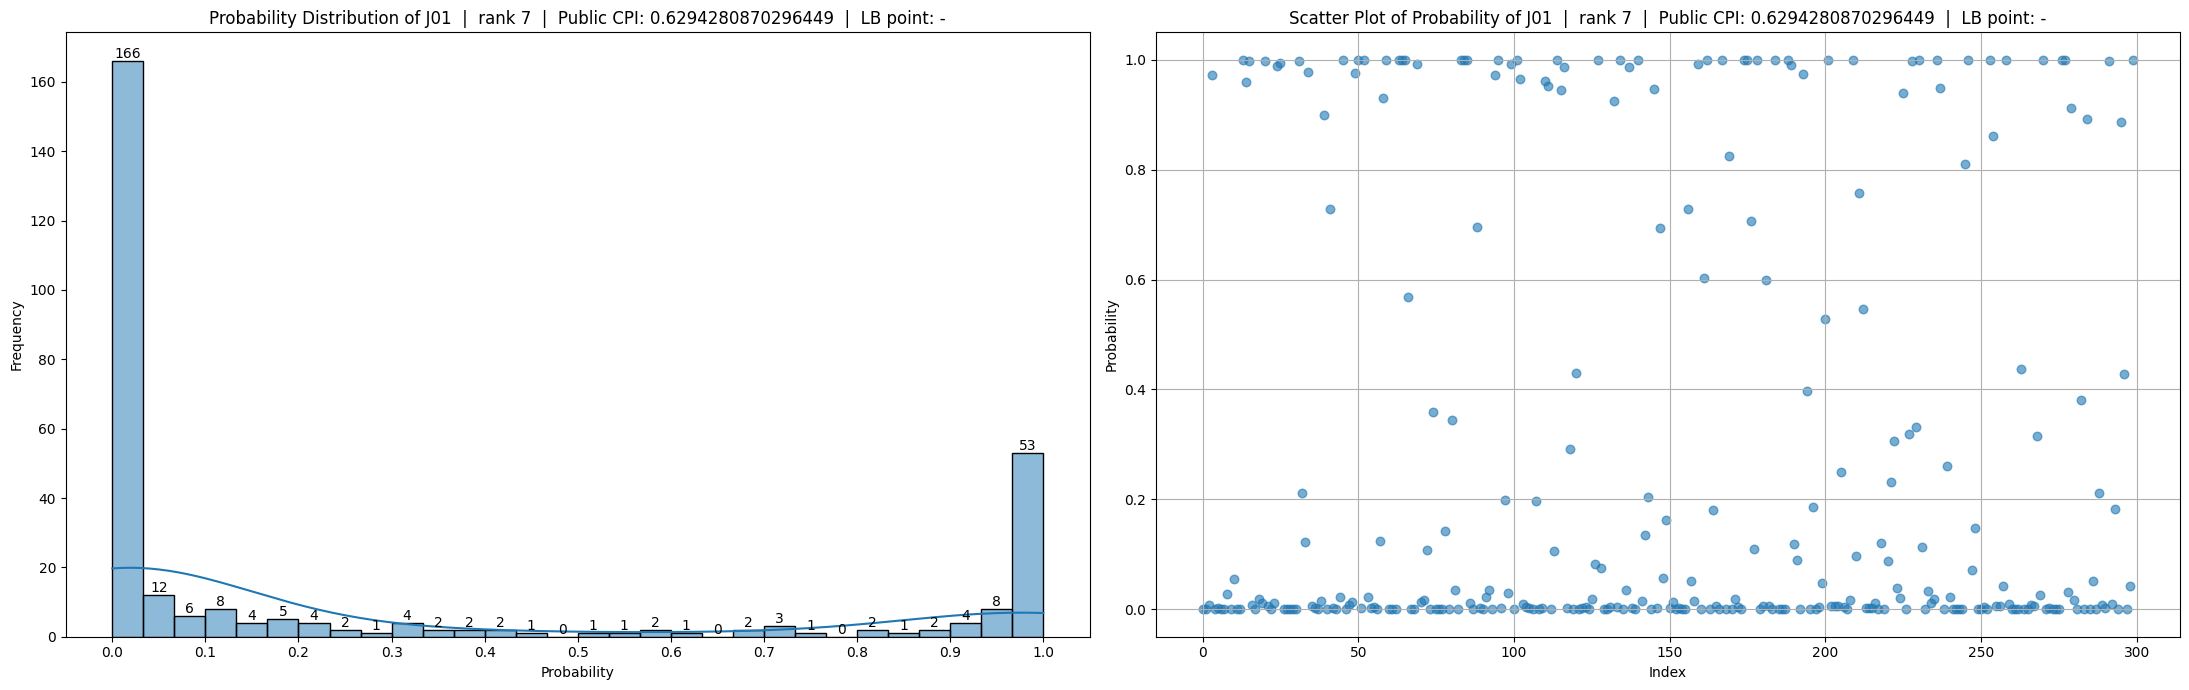

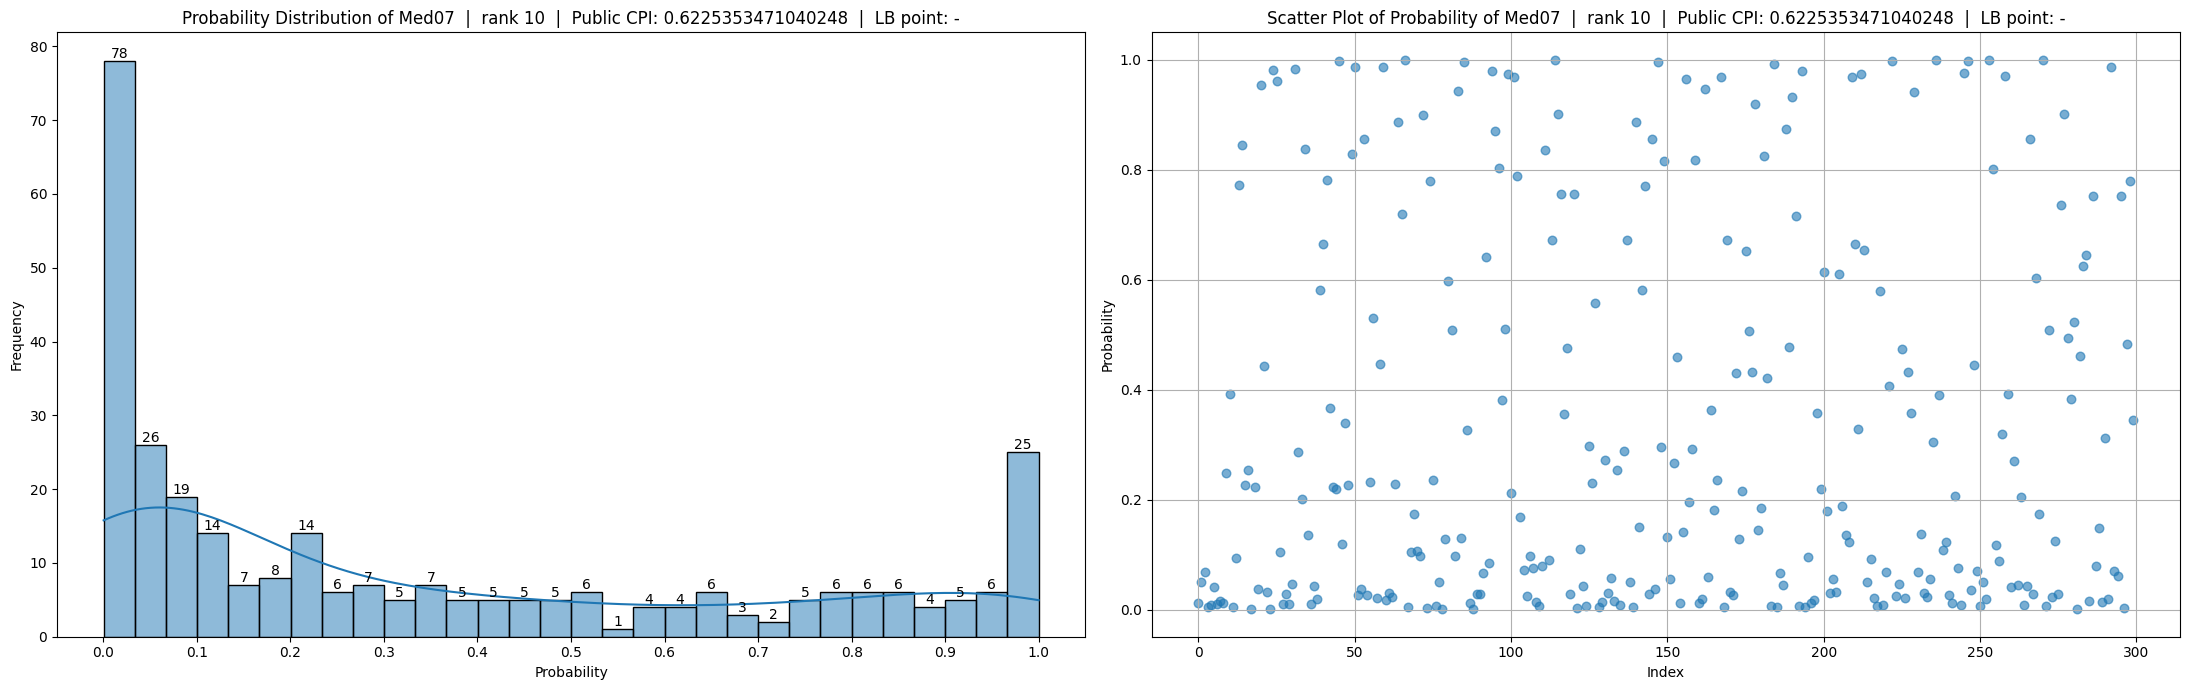

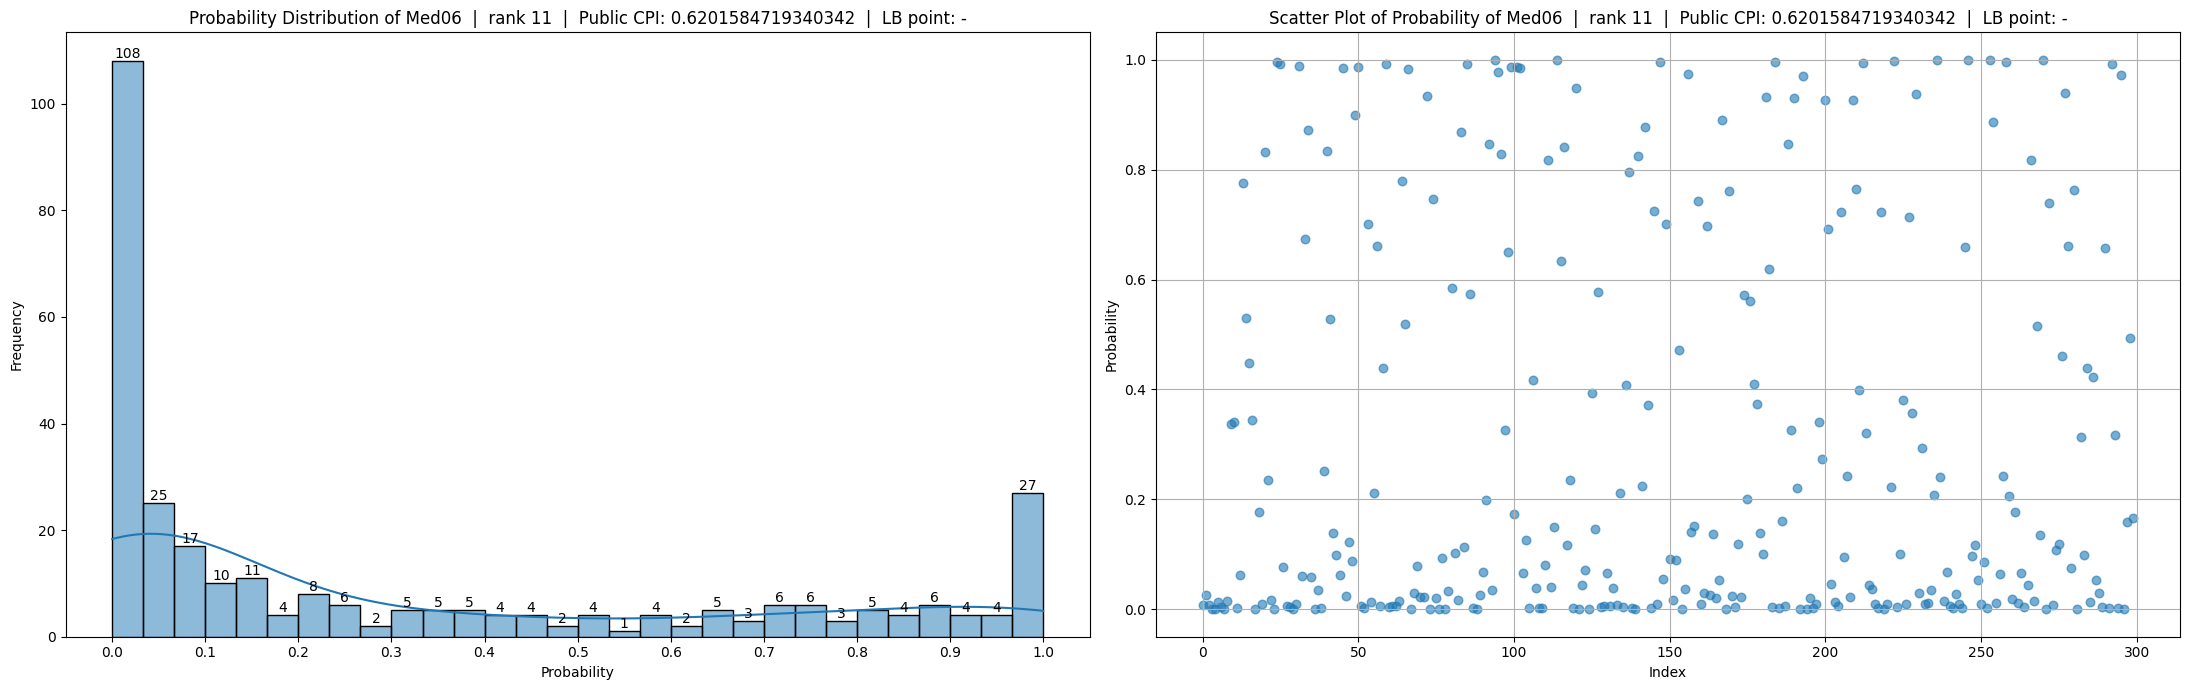

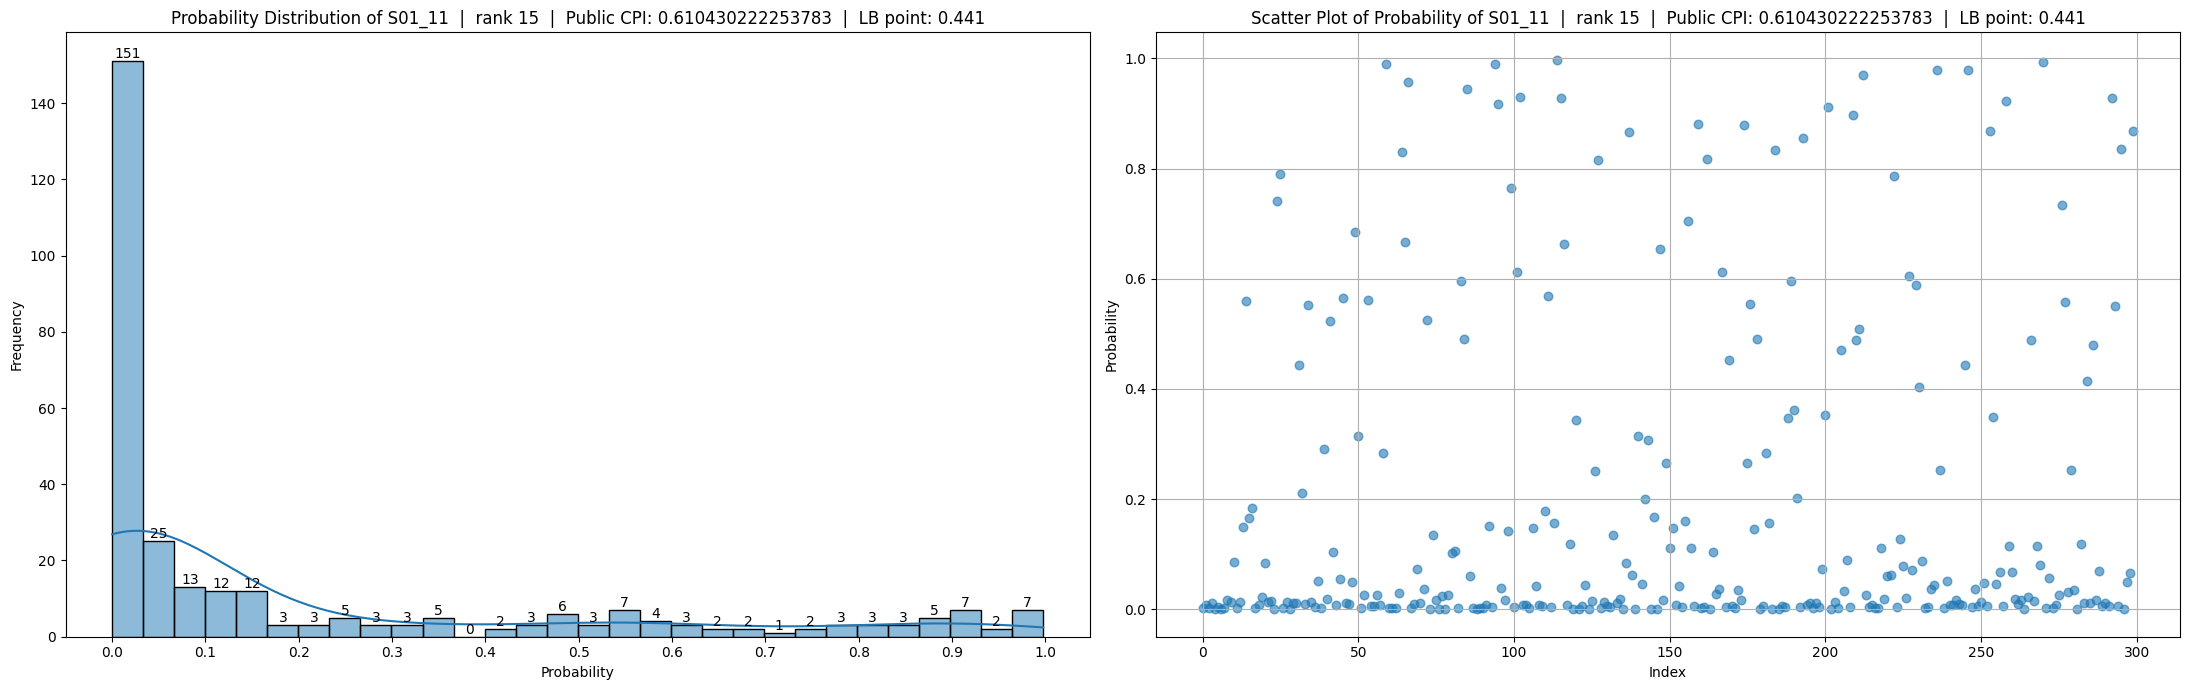

In [6]:
# 데이터프레임과 관련 정보를 딕셔너리로 정의
data_info = [
    {'df': rank_1_T08,     'title': 'T#08',   'rank_num': 1,  'cpi_public': 0.6652357924051264, 'lb_point': 0.49},
    {'df': rank_2_T27,     'title': 'T#27',   'rank_num': 2,  'cpi_public': 0.6525536760774007, 'lb_point': '-'},
    {'df': rank_4_S01,     'title': 'S01',    'rank_num': 4,  'cpi_public': 0.6511957550228489, 'lb_point': 0.468},
    {'df': rank_5_T01,     'title': 'T#01',   'rank_num': 5,  'cpi_public': 0.6399507774911612, 'lb_point': '-'},
    {'df': rank_6_JT27,    'title': 'JT27',   'rank_num': 6,  'cpi_public': 0.6303431708657848, 'lb_point': '-'},
    {'df': rank_7_J01,     'title': 'J01',    'rank_num': 7,  'cpi_public': 0.6294280870296449, 'lb_point': '-'},
    {'df': rank_10_Med07,  'title': 'Med07',  'rank_num': 10, 'cpi_public': 0.6225353471040248, 'lb_point': '-'},
    {'df': rank_11_Med06,  'title': 'Med06',  'rank_num': 11, 'cpi_public': 0.6201584719340342, 'lb_point': '-'},
    {'df': rank_15_S01_11, 'title': 'S01_11', 'rank_num': 15, 'cpi_public': 0.610430222253783,  'lb_point': 0.441},
]

for info in data_info:
    df = info['df']
    title = info['title']
    rank_num = info['rank_num']
    cpi_public = info['cpi_public']
    lb_point = info['lb_point']

    # 각 데이터프레임의 컬럼명을 'Probability'로 변경
    df = df.rename(columns={df.columns[0]: 'Probability'})  # 첫 번째 컬럼을 'Probability'로 변경

    # 서브플롯 생성
    fig, axes = plt.subplots(1, 2, figsize=(22, 7))  # 1행 2열의 서브플롯

    # 히스토그램
    sns.histplot(df['Probability'], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Probability Distribution of {title}  |  rank {rank_num}  |  Public CPI: {cpi_public}  |  LB point: {lb_point}')
    axes[0].set_xlabel('Probability')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xticks([i * 0.1 for i in range(0, 11)])  # 0.0, 0.1, ..., 1.0

    # 각 막대 위에 값 표시
    for p in axes[0].patches:
        height = p.get_height()
        axes[0].text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', 
                      ha='center', va='bottom')

    # 산점도
    axes[1].scatter(df.index, df['Probability'], alpha=0.6, s=38)
    axes[1].set_title(f'Scatter Plot of Probability of {title}  |  rank {rank_num}  |  Public CPI: {cpi_public}  |  LB point: {lb_point}')
    axes[1].set_xlabel('Index')
    axes[1].set_ylabel('Probability')
    axes[1].grid(True)

    plt.tight_layout()  # 서브플롯 간의 간격 조정
    plt.savefig(f'./Analysis_Probability_Distribution_rank{rank_num}_cpi_{cpi_public}_{title}.jpg', dpi=200, bbox_inches='tight')
    plt.show()

In [7]:
# # 서브플롯 생성
# fig, axes = plt.subplots(1, 2, figsize=(22, 7))  # 1행 2열의 서브플롯

# # 히스토그램
# sns.histplot(rank_1_T08['Probability'], bins=30, kde=True, ax=axes[0])
# axes[0].set_title('Probability Distribution of T#08')
# axes[0].set_xlabel('Probability')
# axes[0].set_ylabel('Frequency')
# axes[0].set_xticks([i * 0.1 for i in range(0, 11)])  # 0.0, 0.1, ..., 1.0

# # 각 막대 위에 값 표시
# for p in axes[0].patches:
#     height = p.get_height()
#     axes[0].text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', 
#                   ha='center', va='bottom')

# # 산점도
# axes[1].scatter(rank_1_T08.index, rank_1_T08['Probability'], alpha=0.6, s=38)
# axes[1].set_title('Scatter Plot of Probability of T#08')
# axes[1].set_xlabel('Index')
# axes[1].set_ylabel('Probability')
# axes[1].grid(True)

# plt.tight_layout()  # 서브플롯 간의 간격 조정
# plt.show()

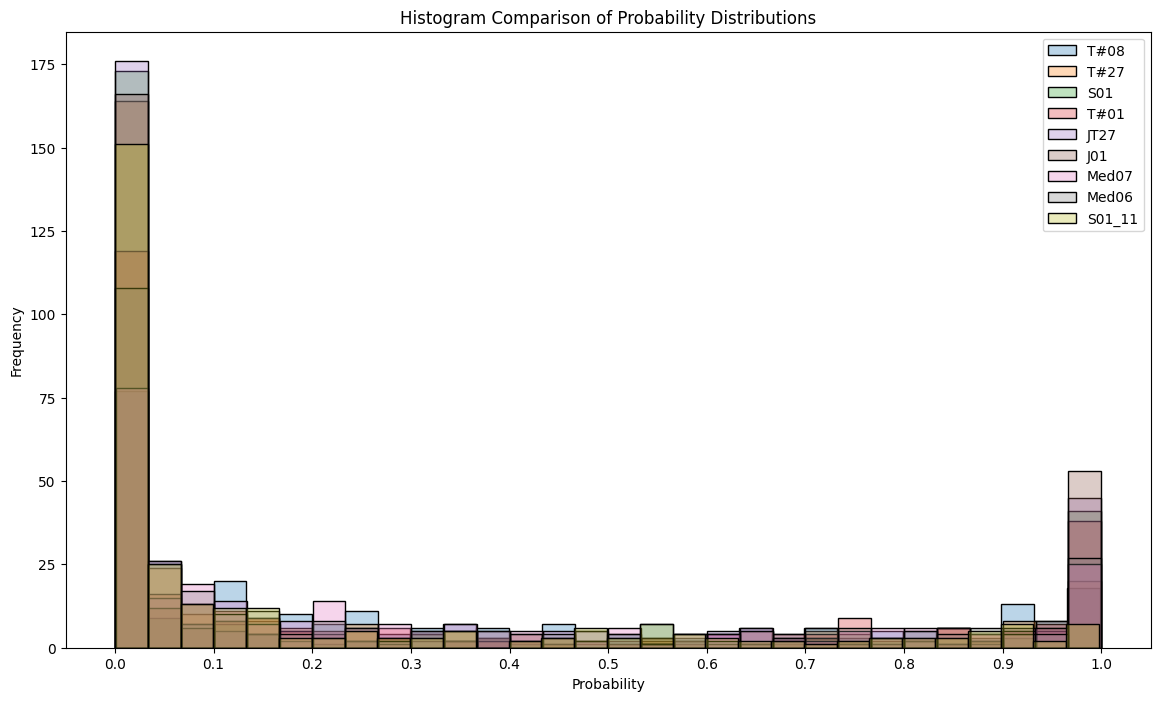

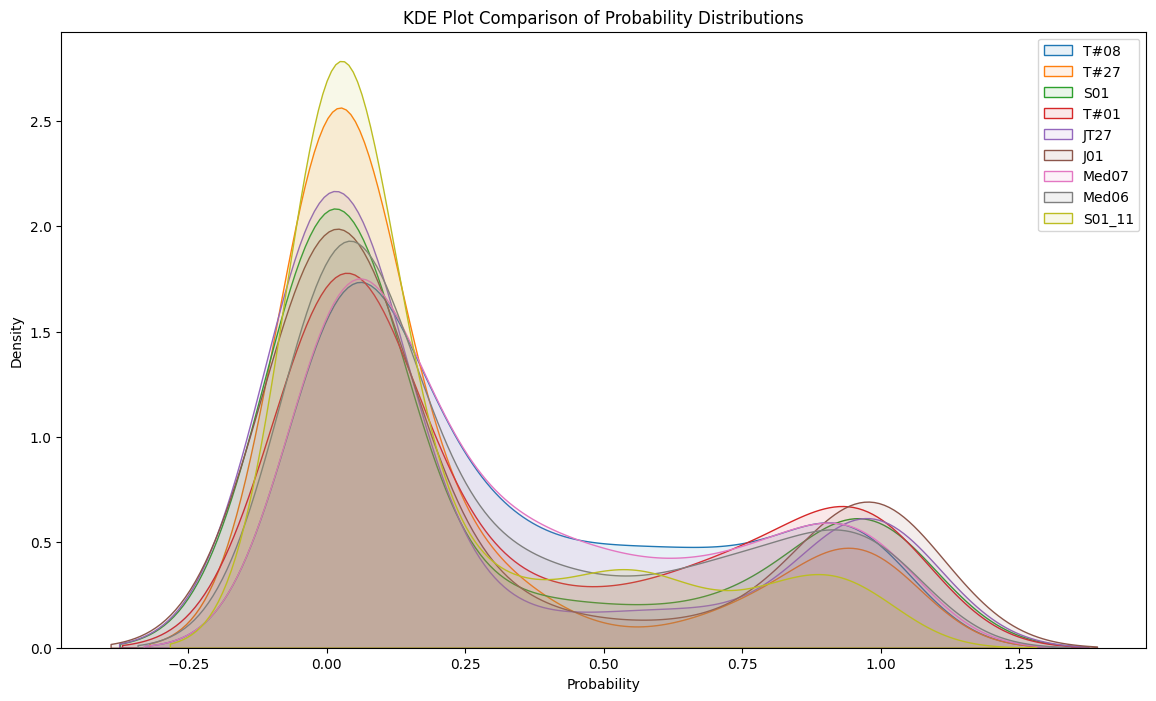

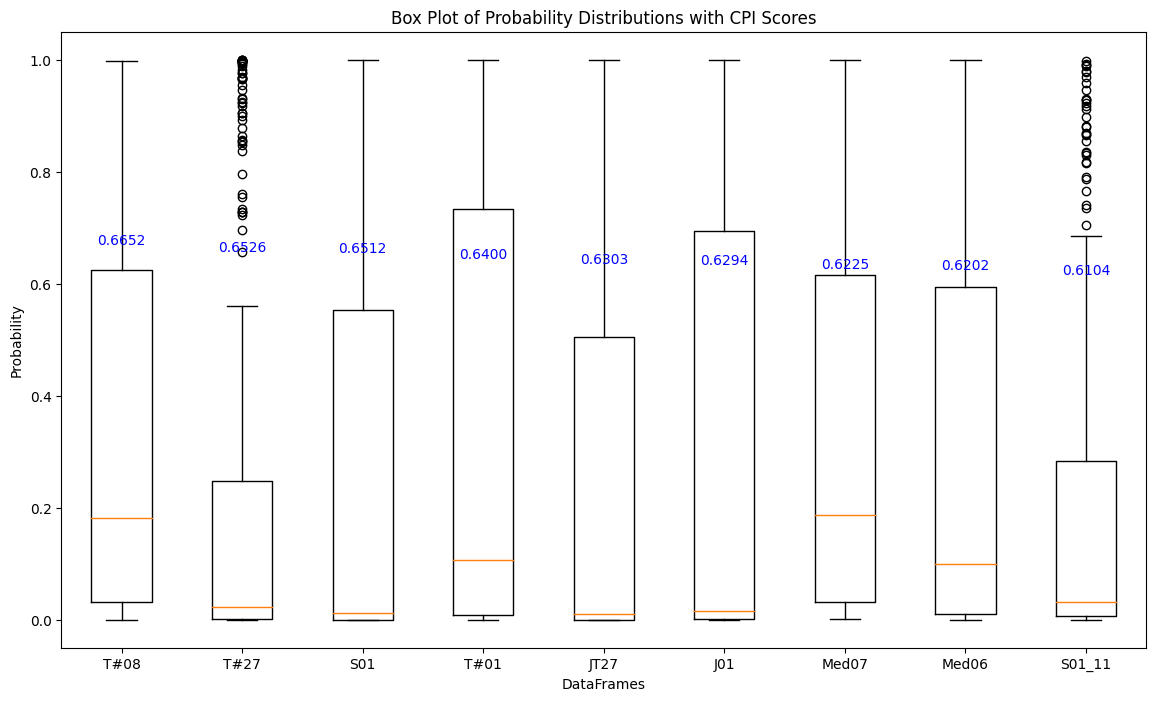

In [8]:
# 데이터프레임과 관련 정보를 딕셔너리로 정의
data_info = [
    {'df': rank_1_T08,     'title': 'T#08',   'rank_num': 1,  'cpi_public': 0.6652357924051264, 'lb_point': 0.49},
    {'df': rank_2_T27,     'title': 'T#27',   'rank_num': 2,  'cpi_public': 0.6525536760774007, 'lb_point': '-'},
    {'df': rank_4_S01,     'title': 'S01',    'rank_num': 4,  'cpi_public': 0.6511957550228489, 'lb_point': 0.468},
    {'df': rank_5_T01,     'title': 'T#01',   'rank_num': 5,  'cpi_public': 0.6399507774911612, 'lb_point': '-'},
    {'df': rank_6_JT27,    'title': 'JT27',   'rank_num': 6,  'cpi_public': 0.6303431708657848, 'lb_point': '-'},
    {'df': rank_7_J01,     'title': 'J01',    'rank_num': 7,  'cpi_public': 0.6294280870296449, 'lb_point': '-'},
    {'df': rank_10_Med07,  'title': 'Med07',  'rank_num': 10, 'cpi_public': 0.6225353471040248, 'lb_point': '-'},
    {'df': rank_11_Med06,  'title': 'Med06',  'rank_num': 11, 'cpi_public': 0.6201584719340342, 'lb_point': '-'},
    {'df': rank_15_S01_11, 'title': 'S01_11', 'rank_num': 15, 'cpi_public': 0.610430222253783,  'lb_point': 0.441},
]

# 1. 히스토그램 비교
plt.figure(figsize=(14, 8))
for info in data_info:
    # 각 데이터프레임의 컬럼명을 'Probability'로 변경
    info['df'] = info['df'].rename(columns={info['df'].columns[0]: 'Probability'})  # 첫 번째 컬럼을 'Probability'로 변경
    sns.histplot(info['df']['Probability'], bins=30, kde=False, label=info['title'], alpha=0.3)
plt.title('Histogram Comparison of Probability Distributions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.xticks([i * 0.1 for i in range(0, 11)])  # 0.0, 0.1, ..., 1.0

plt.legend()
plt.show()

# 2. KDE 플롯
plt.figure(figsize=(14, 8))
for info in data_info:
    info['df'] = info['df'].rename(columns={info['df'].columns[0]: 'Probability'})  # 첫 번째 컬럼을 'Probability'로 변경
    sns.kdeplot(info['df']['Probability'], label=info['title'], fill=True, alpha=0.1)
plt.title('KDE Plot Comparison of Probability Distributions')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

# 3. 상자 수염 그림(Box Plot)
plt.figure(figsize=(14, 8))
info['df'] = info['df'].rename(columns={info['df'].columns[0]: 'Probability'})  # 첫 번째 컬럼을 'Probability'로 변경
box_data = [info['df']['Probability'] for info in data_info]
plt.boxplot(box_data, labels=[info['title'] for info in data_info])
plt.title('Box Plot of Probability Distributions with CPI Scores')
plt.xlabel('DataFrames')
plt.ylabel('Probability')
# 각 CPI 점수를 Box Plot 위에 표시
cpi_scores = [info['cpi_public'] for info in data_info]
for i, cpi in enumerate(cpi_scores):
    plt.text(i + 1, cpi, f'{cpi:.4f}', ha='center', va='bottom', color='blue')
plt.show()
